#### Matplotlib과 Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fname = fm.FontProperties(fname='D:/data_starfish/jupyter/malgun.ttf').get_name()
from IPython.display import Image
mpl.rc('font',family=fname)
import matplotlib.gridspec as gridspec
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
%matplotlib inline
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [63]:
'''
N(1000,100)인 정규분포를 따르는 랜덤 주가 생성
2018년 9월 1일부터 30일 동안의 날짜로 인덱스 생성
칼럼명을 기업명으로 설정
'''
df = pd.DataFrame(np.random.randn(30,3)*100 + 1000,
                 index = pd.date_range(start='2018-09-01', periods=30, freq='D'),
                 columns = ['천리마마트', '히드라마트', '터렛마트'])

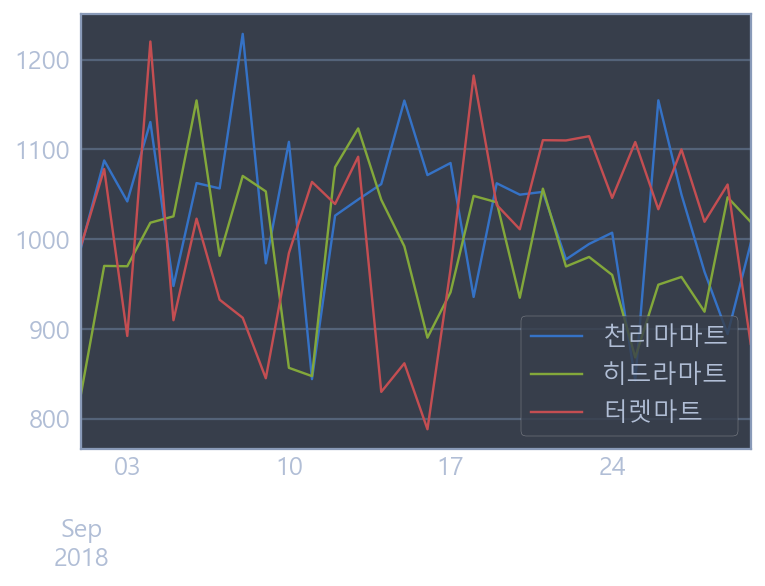

In [24]:
df.plot.line() # 팬더스와 함께 그려낸 기본 차트

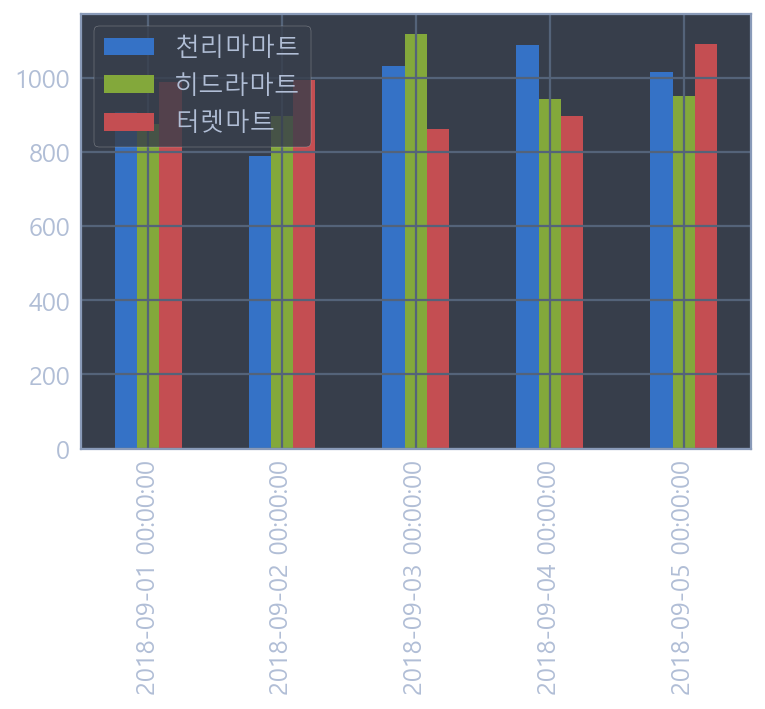

In [51]:
# 막대그래프 그리기
# 9/1~9/5 데이터
df[:5].plot.bar()

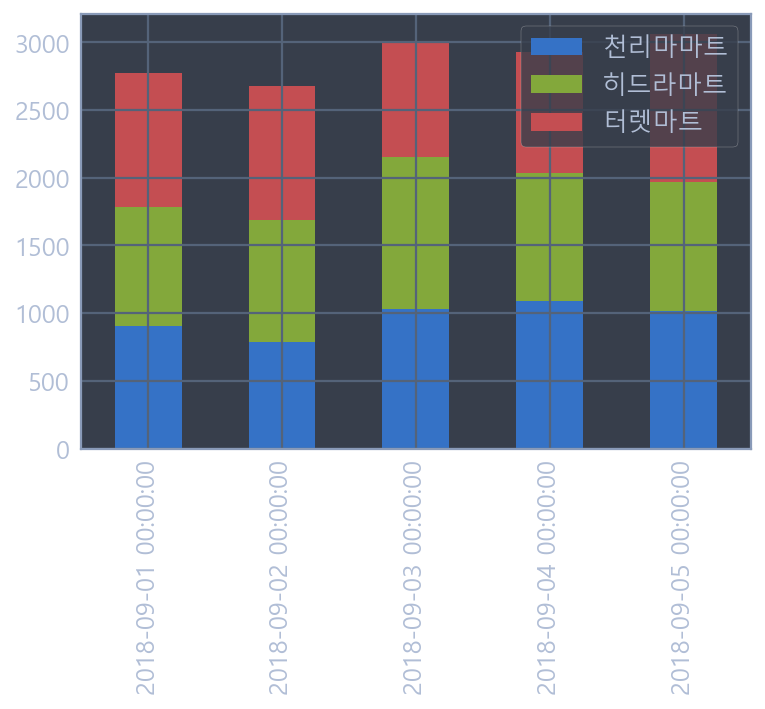

In [55]:
df[:5].plot.bar(stacked=True)

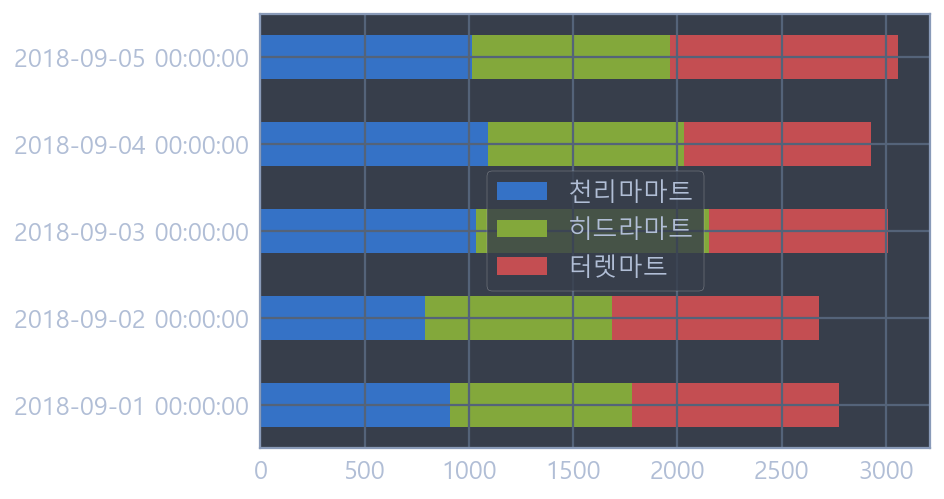

In [57]:
df[:5].plot.barh(stacked=True)

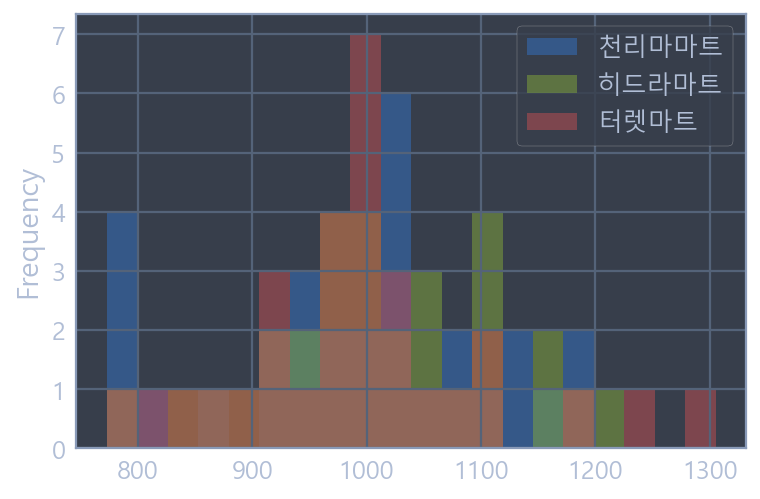

In [58]:
# 데이터 분포를 나타내는 히스토그램
# df.plot.hist
# bins=사이즈
# alpha=1 => 완전 불투명, alpha=0 => 완전 투명
df.plot.hist(bins=20, grid= True, alpha = 0.5)

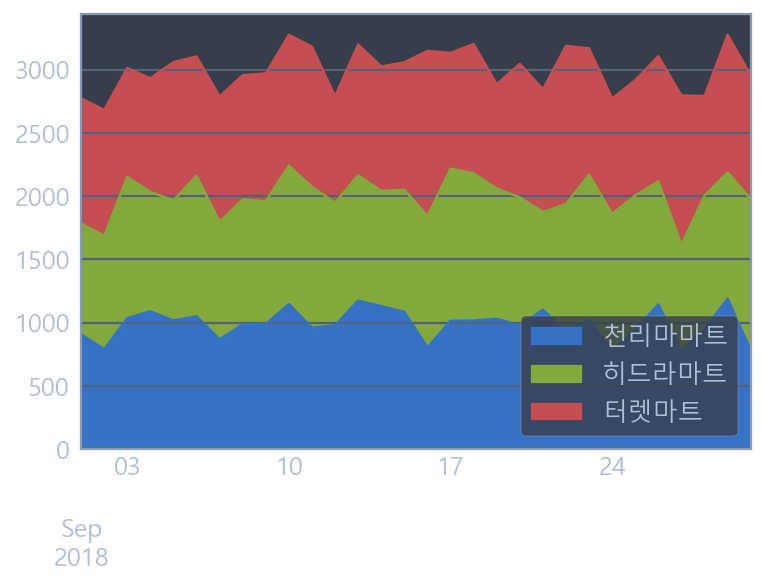

In [60]:
# 영역형 그래프
# 여러 데이터의 누적값 움직임을 나타내는 데 좋음
# df.plot.area()
df.plot.area(stacked=True)

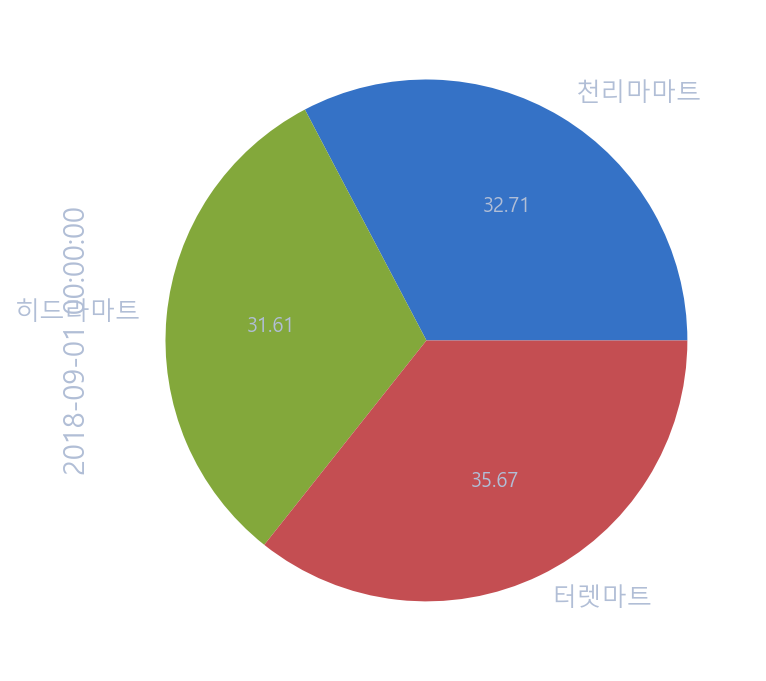

In [61]:
# 원 그래프
# 특정 시점의 데이터 값 크기를 비교할 때 좋음
df.iloc[0].plot.pie(figsize=(6,6), autopct='%.2f')

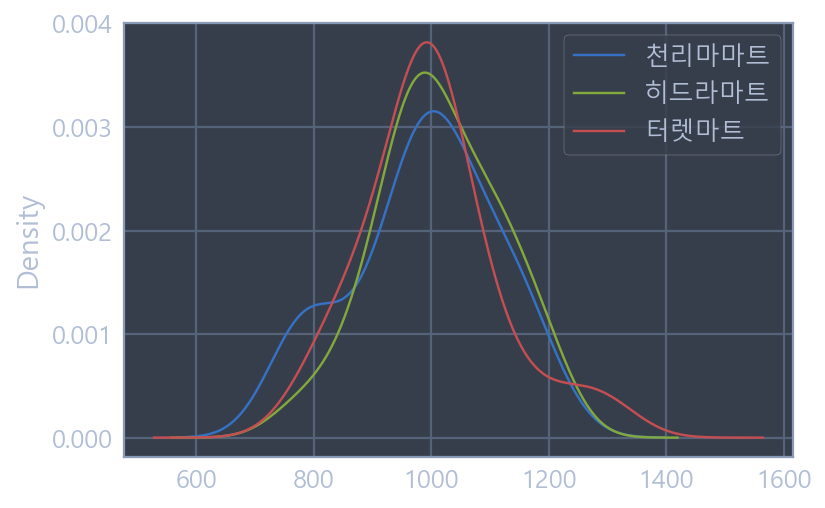

In [62]:
# 밀도 그래프
# 데이터 값이 어떤 모양으로 분포되어 있는지
# 핵밀도추정 (kernel density estimation)
# df.plot.kde()
df.plot.kde()

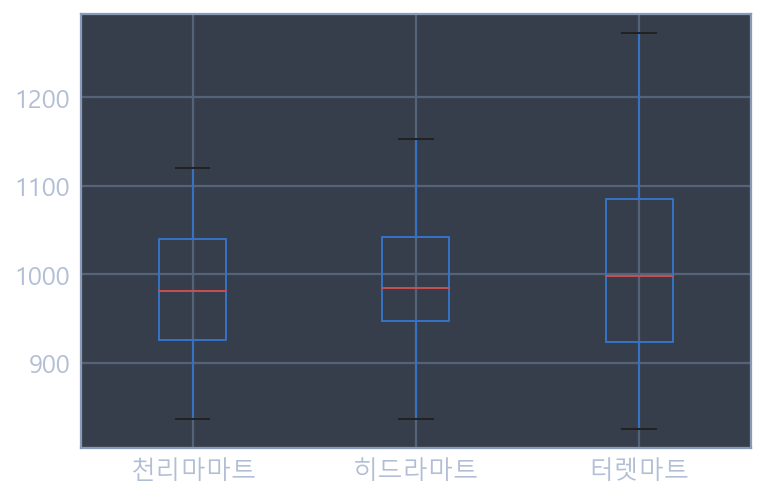

In [64]:
# 통계치를 그래프와 함께 보여줄 박스 그래프
# 맨위에서부터 최댓값 / 상위 25% / 중간값 / 하위 25% / 최솟값
df.plot.box()

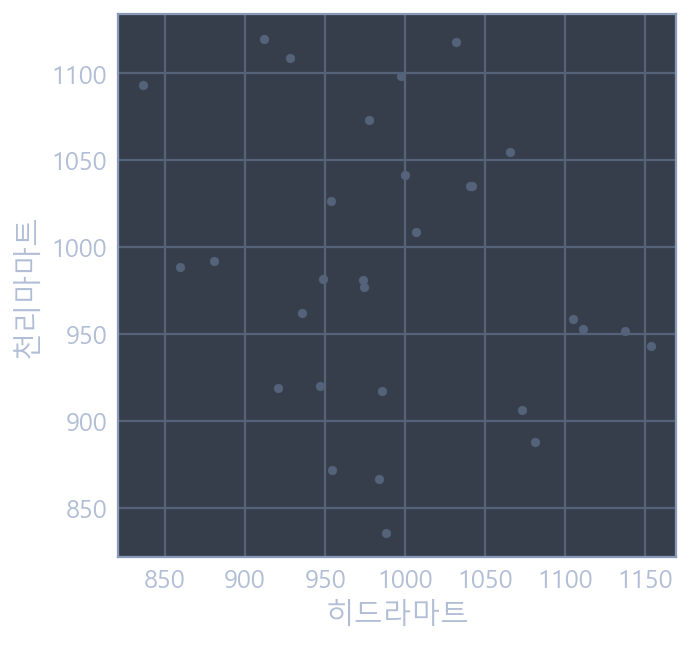

In [65]:
# 관계를 표시하는 산포도
df.plot.scatter(x='히드라마트',y='천리마마트',figsize=(5,5))

#### 3D 그래프 그리기

In [66]:
from mpl_toolkits.mplot3d import Axes3D

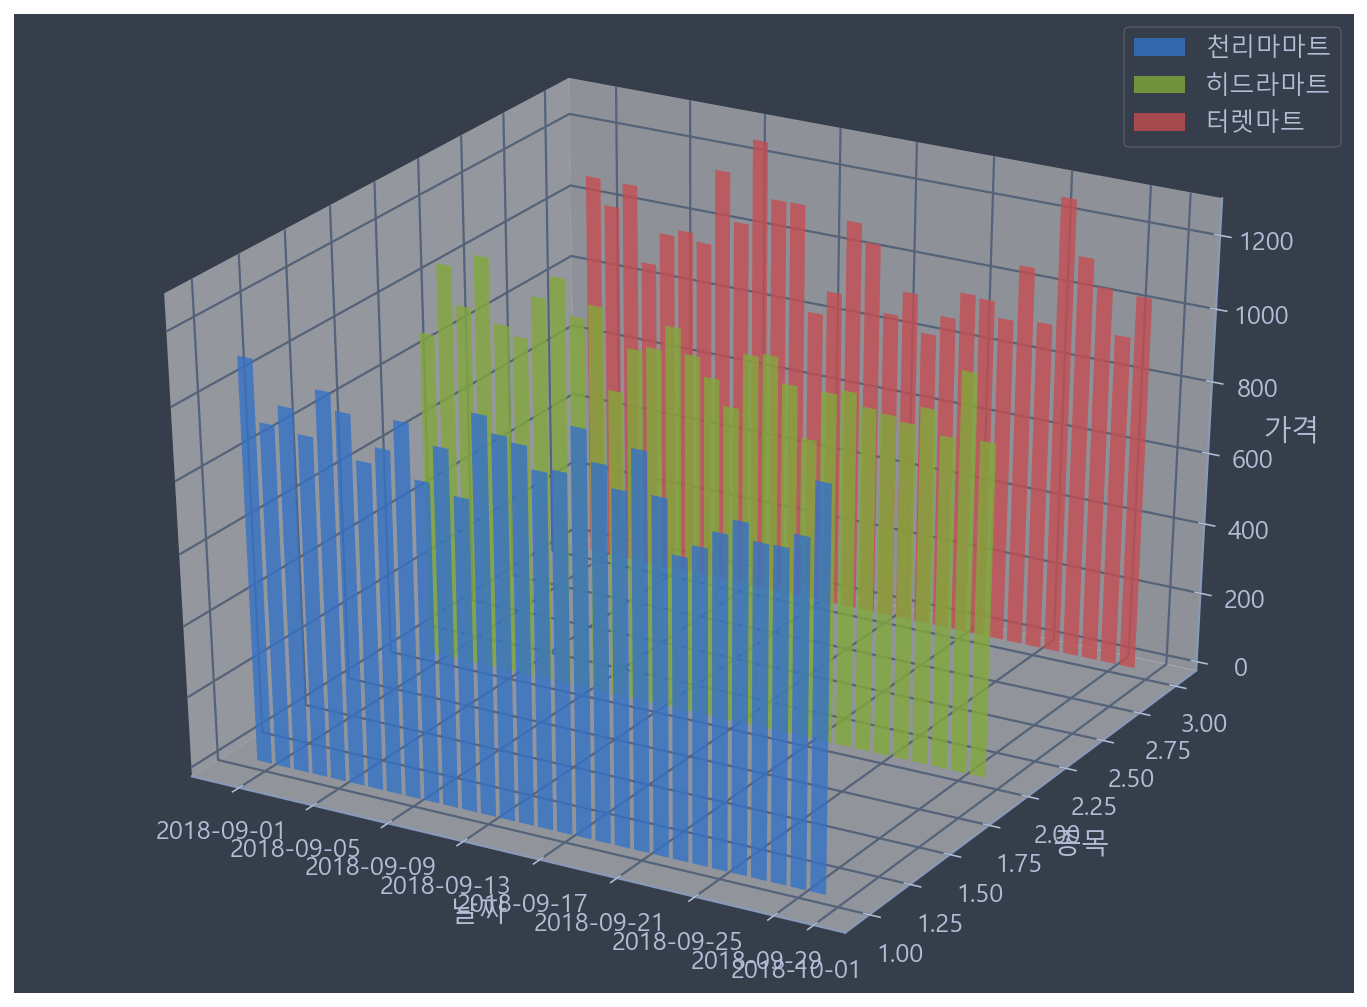

In [69]:
# X축: 기간, Y축: 종목, Z축: 가격
# 3D 막대그래프 --> X값, 높이값(Z값), 데이터 구분값(Y값) + 어느 방향으로 데이터를 움직이며 그래프를 그릴 지 지정해야함
# ax.bar(X값, Z값, Y값, zdir='방향')
fig = plt.figure(figsize=(12,9))
# fig를 1행 1열로 지정하고, 서브플롯을 삽입한 후 해당 서브플롯을 ax라고 지정
ax = fig.add_subplot(111, projection='3d')
# 막대 그래프를 하나씩 그리는 과정
for z, n in zip([1,2,3], df.columns):
    left = df[n].index
    height = df[n].values # Z값 (높이값)
    zs = z # Y축 (데이터 구분)
    ax.bar(left, height, zs, zdir='y', alpha=0.8)
    
ax.set_xlabel('날짜') # X축 이름 삽입
ax.set_ylabel('종목') # Y축 이름 삽입
ax.set_zlabel('가격') # Z축 이름 삽입

ax.legend(df.columns)

In [71]:
# 입체 평면 -> 각 축의 값이 2X2 매트릭스 형태로 입력되어야 함
#(((1,4),(1,5),(1,6)), ((2,4),(2,5),(2,6)), (3,4),(3,5),(3,6))에 해당하는 매트릭스 전체의 점에 대해 Z값을 계산하고 이들을 연결해야함
# 컬러맵 불러오기
from matplotlib import cm

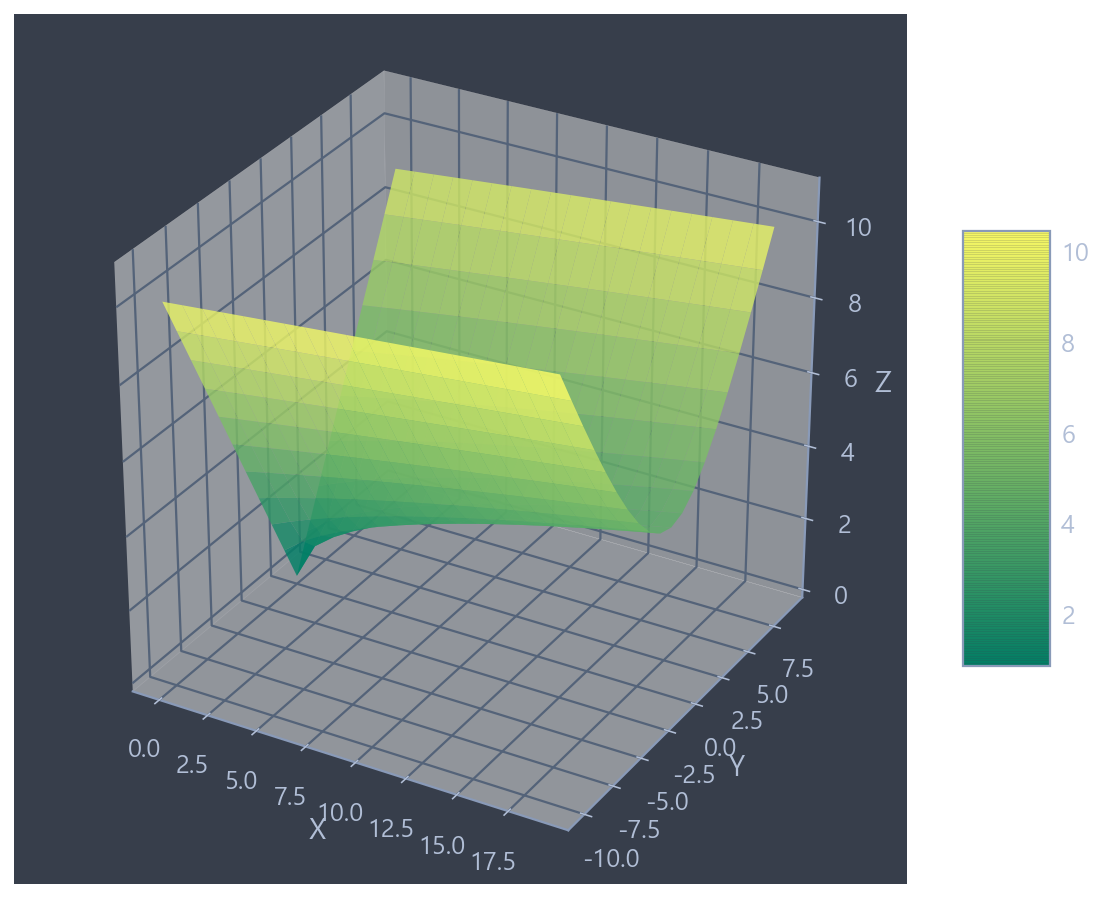

In [73]:
fig = plt.figure(figsize=(10,8))
# fig를 1행 1열로 지정하고, 서브플롯을 삽입한 후 해당 서브플롯을 ax라고 지정
ax = fig.gca(projection='3d')

X = np.arange(0,20)
Y = np.arange(-10,10)
X,Y = np.meshgrid(X,Y) # X,Y를 매트릭스로 변환
Z = np.sqrt(Y**2 + X) # 매트릭스 각 점마다 Z값 계산

# 입체 평면 그리기 및 surf에 할당
surf = ax.plot_surface(X,Y,Z,cmap=cm.summer, linewidth=1, alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf, shrink=0.5, aspect=5) # 컬러바 표시